<a href="https://colab.research.google.com/github/Hub-Rodrigo/Analise-de-dados/blob/main/Desafiodia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Clientes VIP (maior ticket médio)
Para identificar os clientes VIP, vamos calcular o ticket médio de cada cliente e listar aqueles com os maiores valores.

In [ ]:
clientes_vip = (
    df.groupby(['cliente_id', 'nome_y'])
    .agg(ticket_medio=('valor_total', 'mean'))
    .reset_index()
    .sort_values(by='ticket_medio', ascending=False)
    .head(10) # Pegando os 10 principais clientes VIP
)

print("\nClientes VIP (Maior Ticket Médio):")
print(clientes_vip)


Clientes VIP (Maior Ticket Médio):
   cliente_id    nome_y  ticket_medio
4           5    Carlos     94.088399
1           2     Maria     93.528740
2           3      João     92.762252
0           1     Lucas     92.437260
3           4  Fernanda     90.628810
6           7    Marina     87.101624
5           6   Roberta     81.672753


### Comparação do Ticket Médio: Clientes VIP vs. Todos os Clientes

Vamos calcular o ticket médio para todos os clientes e compará-lo com o ticket médio dos clientes VIP para entender a diferença.

In [ ]:
ticket_medio_todos_clientes = df.groupby(['cliente_id', 'nome_y'])['valor_total'].mean().mean()
ticket_medio_vip_clientes = clientes_vip['ticket_medio'].mean()

comparacao_ticket_medio = pd.DataFrame({
    'Tipo de Cliente': ['Todos os Clientes', 'Clientes VIP'],
    'Ticket Médio': [ticket_medio_todos_clientes, ticket_medio_vip_clientes]
})

print("\nComparativo de Ticket Médio:")
print(comparacao_ticket_medio)


Comparativo de Ticket Médio:
     Tipo de Cliente  Ticket Médio
0  Todos os Clientes      90.31712
1       Clientes VIP      90.31712


### Visualização da Comparação de Ticket Médio

Para uma melhor compreensão, vamos visualizar essa comparação em um gráfico de barras.

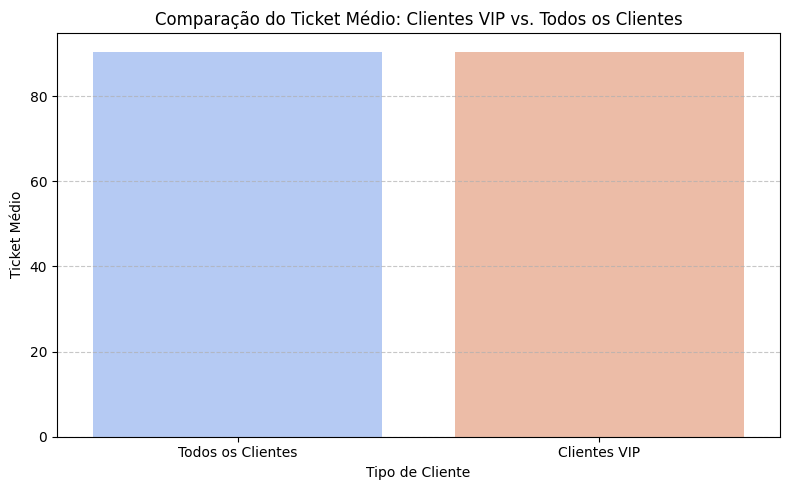

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x='Tipo de Cliente', y='Ticket Médio', data=comparacao_ticket_medio, palette='coolwarm', hue='Tipo de Cliente', legend=False)
plt.title('Comparação do Ticket Médio: Clientes VIP vs. Todos os Clientes')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Ticket Médio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Visualização do Ticket Médio dos Clientes VIP

Para visualizar a distribuição do ticket médio entre os clientes VIP, vamos criar um gráfico de barras.

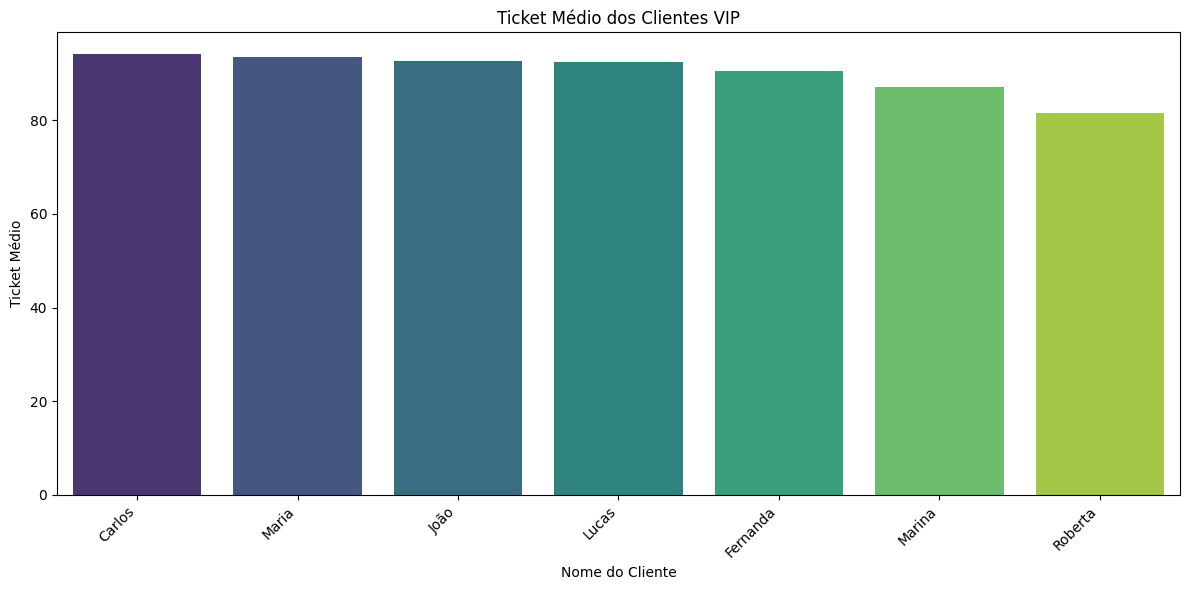

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='nome_y', y='ticket_medio', data=clientes_vip, palette='viridis', hue='nome_y', legend=False)
plt.title('Ticket Médio dos Clientes VIP')
plt.xlabel('Nome do Cliente')
plt.ylabel('Ticket Médio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 1. Preparação dos Dados

In [ ]:
import pandas as pd
import numpy as np

# Base ampliada com múltiplos dados, família, segmentos, meses, ticket variável
np.random.seed(42)

produtos = ['Produto A', 'Produto B', 'Produto C', 'Produto D']
familias = ['Bebidas', 'Lanches', 'Doces', 'Limpeza']
clientes = ['Lucas', 'Maria', 'João', 'Fernanda', 'Carlos', 'Roberta', 'Marina']
enderecos = ['Centro', 'Bairro Novo', 'Vila Rica', 'Jardim']
anos = [2024, 2025]
meses = list(range(1, 13))

n = 2000
fato_venda = pd.DataFrame({
    'venda_id': np.arange(1000, 1000 + n),
    'tempo_id': np.random.randint(100, 200, size=n),
    'cliente_id': np.random.choice(range(1, 8), size=n),
    'produto_id': np.random.choice(range(1, 5), size=n),
    'quantidade': np.random.randint(1, 10, size=n),
    'valor_unitario': np.random.choice([10, 20, 35, 5], size=n) * np.random.uniform(0.8, 1.25, size=n),
    'ano': np.random.choice(anos, size=n),
    'mes': np.random.choice(meses, size=n)
})
# A coluna 'trimestre' deve ser criada após a 'mes'
fato_venda['trimestre'] = (fato_venda['mes'] - 1) // 3 + 1

fato_venda['valor_total'] = fato_venda['quantidade'] * fato_venda['valor_unitario']

dim_produto = pd.DataFrame({
    'produto_id': range(1, 5),
    'nome': produtos,
    'familia': familias
})

dim_cliente = pd.DataFrame({
    'cliente_id': range(1, 8),
    'nome': clientes,
    'endereco': np.random.choice(enderecos, size=7)
})

# =====================================
# 2. Consulta - Top produtos vendidos
# =====================================
df = fato_venda.merge(dim_produto, on='produto_id', suffixes=('_x', '_y')) # Adicionado sufixos para evitar colunas duplicadas
df = df.merge(dim_cliente, on='cliente_id', suffixes=('_x', '_y')) # Adicionado sufixos para evitar colunas duplicadas

top_produtos = (
    df.groupby(['nome_x', 'familia']) # Usando nome_x para o nome do produto
    .agg({'quantidade': 'sum', 'valor_total': 'sum'})
    .reset_index()
    .sort_values(by='quantidade', ascending=False)
    .head(20)
)
print("\nTop Produtos Vendidos:")
print(top_produtos)


Top Produtos Vendidos:
      nome_x  familia  quantidade   valor_total
0  Produto A  Bebidas        2609  47802.837380
2  Produto C    Doces        2514  42500.783692
3  Produto D  Limpeza        2483  46458.264974
1  Produto B  Lanches        2472  43787.035137


# 3. Clientes VIP (maior ticket médio)

### Cliente com o Maior Ticket Médio

Vamos identificar o cliente individual com o maior ticket médio de compra.

In [3]:
import pandas as pd
import numpy as np

# Preparação dos dados para garantir que 'df' esteja definido
np.random.seed(42)

produtos = ['Produto A', 'Produto B', 'Produto C', 'Produto D']
familias = ['Bebidas', 'Lanches', 'Doces', 'Limpeza']
clientes = ['Lucas', 'Maria', 'João', 'Fernanda', 'Carlos', 'Roberta', 'Marina']
enderecos = ['Centro', 'Bairro Novo', 'Vila Rica', 'Jardim']
anos = [2024, 2025]
meses = list(range(1, 13))

n = 2000
fato_venda = pd.DataFrame({
    'venda_id': np.arange(1000, 1000 + n),
    'tempo_id': np.random.randint(100, 200, size=n),
    'cliente_id': np.random.choice(range(1, 8), size=n),
    'produto_id': np.random.choice(range(1, 5), size=n),
    'quantidade': np.random.randint(1, 10, size=n),
    'valor_unitario': np.random.choice([10, 20, 35, 5], size=n) * np.random.uniform(0.8, 1.25, size=n),
    'ano': np.random.choice(anos, size=n),
    'mes': np.random.choice(meses, size=n)
})
fato_venda['trimestre'] = (fato_venda['mes'] - 1) // 3 + 1
fato_venda['valor_total'] = fato_venda['quantidade'] * fato_venda['valor_unitario']

dim_produto = pd.DataFrame({
    'produto_id': range(1, 5),
    'nome': produtos,
    'familia': familias
})

dim_cliente = pd.DataFrame({
    'cliente_id': range(1, 8),
    'nome': clientes,
    'endereco': np.random.choice(enderecos, size=7)
})

df = fato_venda.merge(dim_produto, on='produto_id', suffixes=('_x', '_y'))
df = df.merge(dim_cliente, on='cliente_id', suffixes=('_x', '_y'))

clientes_vip = (
    df.groupby(['cliente_id', 'nome_y'])
    .agg(ticket_medio=('valor_total', 'mean'))
    .reset_index()
    .sort_values(by='ticket_medio', ascending=False)
    .head(10) # Pegando os 10 principais clientes VIP
)

cliente_maior_ticket_medio = clientes_vip.iloc[0]

print("\nCliente com o Maior Ticket Médio:")
print(cliente_maior_ticket_medio)


Cliente com o Maior Ticket Médio:
cliente_id              5
nome_y             Carlos
ticket_medio    94.088399
Name: 4, dtype: object


### Análise da Distribuição dos Tickets Médios por Cliente

Vamos calcular o ticket médio para cada cliente e visualizar sua distribuição para entender como os gastos médios se comportam entre a base de clientes.

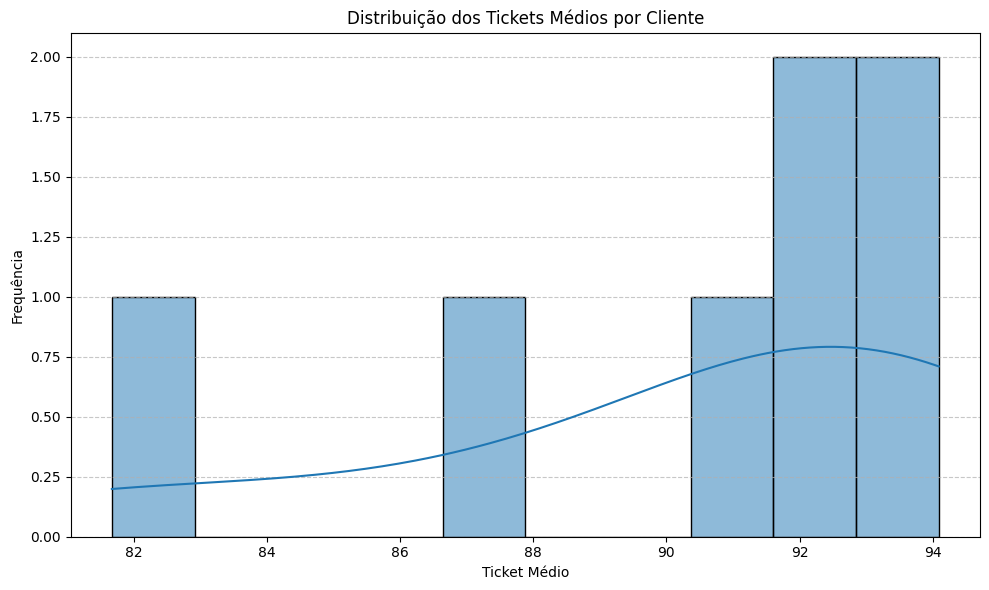

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ticket_medio_por_cliente = df.groupby('cliente_id')['valor_total'].mean().reset_index()
ticket_medio_por_cliente = ticket_medio_por_cliente.rename(columns={'valor_total': 'ticket_medio'})

plt.figure(figsize=(10, 6))
sns.histplot(ticket_medio_por_cliente['ticket_medio'], kde=True, bins=10)
plt.title('Distribuição dos Tickets Médios por Cliente')
plt.xlabel('Ticket Médio')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()